In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import re

# ANALYZE , VISUALIZE AND MAKE A REPORT OF BELOW SCRAPED DATA

In [2]:
headlines=[]
dates=[]
for i in range(1,21):
    site ='https://timesofindia.indiatimes.com/topic/HIV' + '/' + str(i)
    req = requests.get(site)
    soup = BeautifulSoup(req.content,"html.parser")
    headline = soup.find_all('span',{'class':'title'})
    for he in headline:
        headlines.append(he.text.lower().replace('\n',''))
    date = soup.find_all('span',{'class':'meta'})
    for da in date:
        dates.append(da.text)
    
data = pd.DataFrame({'DATES': dates,'HEADLINES': headlines})
# data = data.drop_duplicates()
data.to_csv('article.csv',mode='a',header=False)
# s = s.lower()
data['DATES'] = pd.to_datetime(data['DATES'])  
# # Replace all none alphanumeric characters with spaces
# s = re.sub(r'[^a-zA-Z0-9\s]', ' ', s)

# SCRAPED DATA FROM TIMES OF INDIA

In [3]:
data.head()

,DATES,HEADLINES
0,2018-12-01,i told my boyfriend i was hiv positive and thi...
1,2018-11-30,pay attention to these 7 very common hiv sympt...
2,2019-01-06,transfusion of hiv blood: panel seeks time til...
3,2018-12-01,no. of pregnant women testing hiv+ dips; still...
4,2018-11-30,busted:5 hiv aids myths


# Data cleaning , Noise Removal and collection of Tokens from the headlines

In [4]:

import nltk
import nltk.tokenize as nlptk
from nltk.tokenize import word_tokenize

target_text=[ data['HEADLINES'].iloc[d] for d in range(0,len(data['HEADLINES'])) ]
target_text = ''.join(map(str,target_text))
target_text = re.sub(r'[^a-zA-Z0-9\s]', ' ', target_text)

# #break paragraphs into sentences
# sentence = nlptk.sent_tokenize(text)

# #break paragraphs into  words
words = nlptk.word_tokenize(target_text)

# #check frequency of each word
import nltk.probability as nlppb
freq_words = nlppb.FreqDist(words)

# #plot the words 
# import matplotlib.pyplot as plt
# freq_words.plot()
# plt.show()

# Get the filtered words by removing STOPWORDS from the headlines

In [12]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
filter_words=[]
for w in words:
    if w not in stop_words:
        filter_words.append(w)


# wordcloud of the headlines

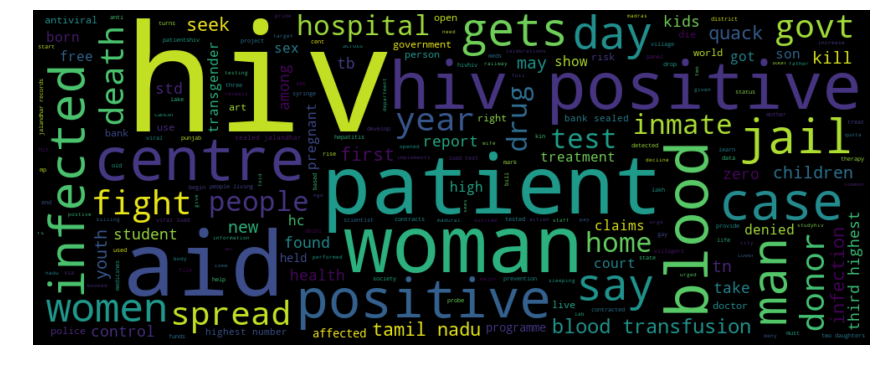

In [160]:

from wordcloud import WordCloud
wordcloud1 = WordCloud(width = 1000, height = 400, margin=10,random_state=3, collocations=True).generate(' '.join(filter_words))

# Save word cloud as .png file
# Image files are saved to the folder "classification_model" 
wordcloud1.to_file("_wordcloud.png")

# Plot wordcloud on console
plt.figure(figsize=(15,8))
plt.imshow(wordcloud1, interpolation="bilinear")
plt.axis("off")
plt.show()


# stemming of the data using natural language toolkit

In [13]:
from nltk.stem import PorterStemmer
stemming_words=[]
for f in filter_words:
    
    stemming_words.append(PorterStemmer().stem(f))
df = pd.DataFrame(stemming_words)
df.head()

,0
0,told
1,boyfriend
2,hiv
3,posit
4,happen


# unigrams , bigrams and trigrams 

<Figure size 432x288 with 0 Axes>

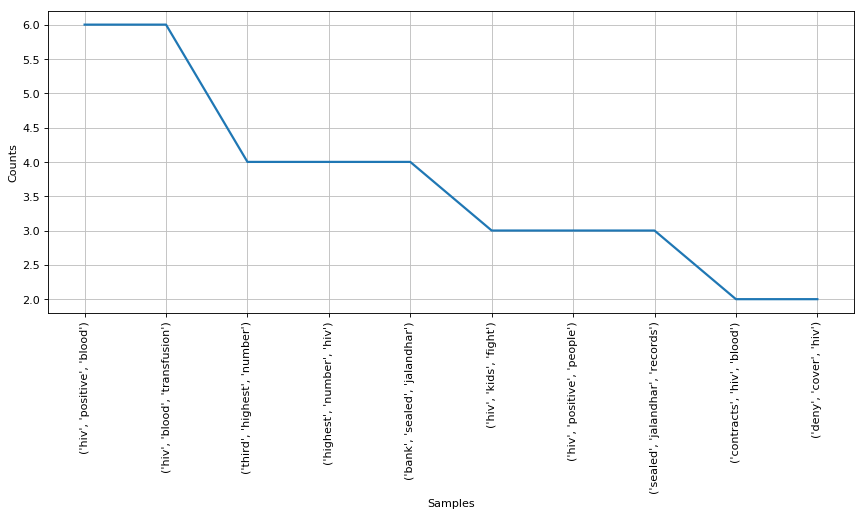

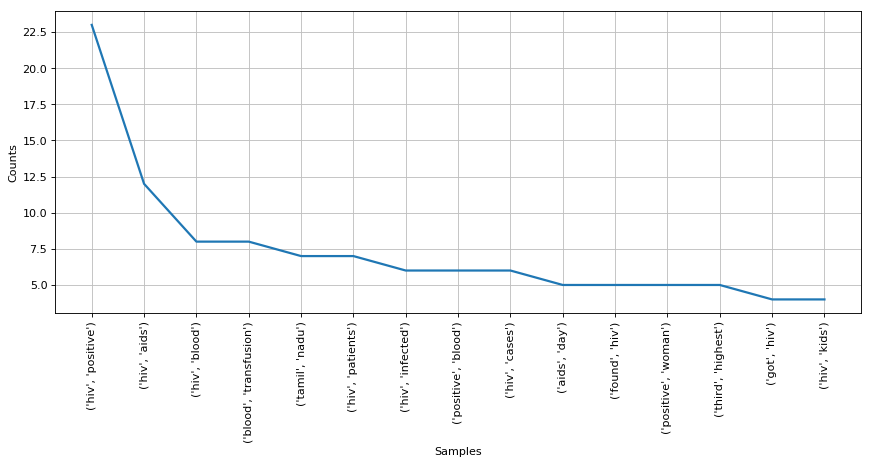

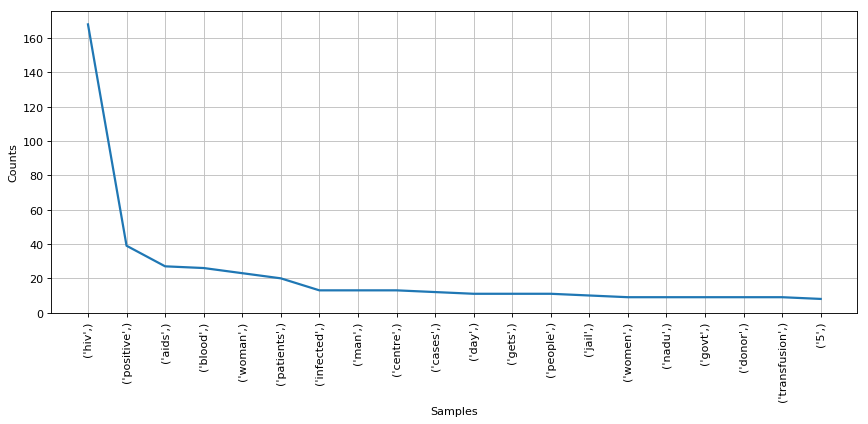

In [171]:
from nltk import ngrams
import nltk
from matplotlib.pyplot import figure
import matplotlib
fig = matplotlib.pyplot.gcf()

tri_grams = ngrams(filter_words, 3)
bi_grams = ngrams(filter_words, 2)
uni_grams = ngrams(filter_words, 1)


figure(num=None, figsize=(13,5), dpi=80, facecolor='w', edgecolor='k')
fdist = nltk.FreqDist(tri_grams)

fdist.plot(10,cumulative=False)
# plt.figure(figsize=(100,10))
plt.show()
figure(num=None, figsize=(13, 5), dpi=80, facecolor='w', edgecolor='k')

fdist = nltk.FreqDist(bi_grams)

fdist.plot(15,cumulative=False)
plt.show()
figure(num=None, figsize=(13, 5), dpi=80, facecolor='w', edgecolor='k')

fdist = nltk.FreqDist(uni_grams)

fdist.plot(20,cumulative=False)
plt.show()

# we can clearly analyze that -MAJORLY WOMENS ARE SUFFERING FROM HIV AIDS RELATIVE TO THE MEN FOLLOWED BY
INFECTIONS,BLOOD TRANSFUSION.THE KIDS ARE ALSO SUFFERING FROM THE HIV AIDS


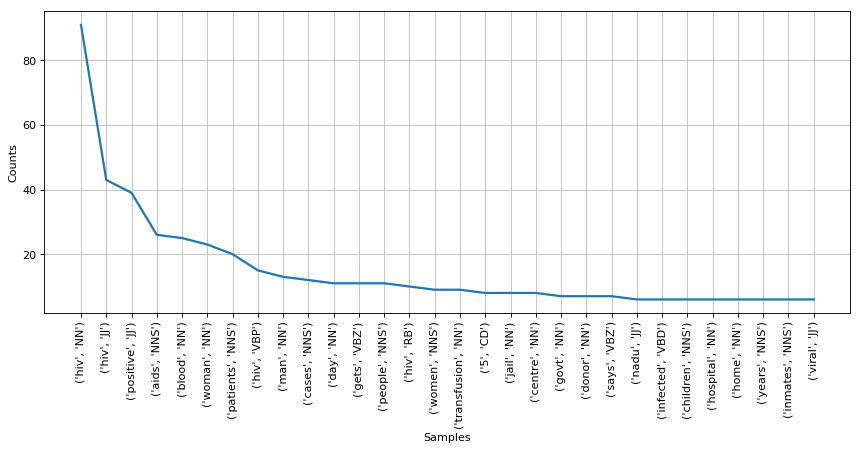

<Figure size 432x288 with 0 Axes>

In [188]:
from matplotlib.pyplot import figure
import nltk.probability as nlppb
import matplotlib.pyplot as plt

freq_words = nlppb.FreqDist(nltk.pos_tag(filter_words))

figure(num=None, figsize=(13, 5), dpi=80, facecolor='W', edgecolor='k')
# #plot the words 

freq_words.plot(30)
plt.show()

# Above graph shows the PARTS OF SPEECH i.e the involvement of the peoples (women,men,kids)

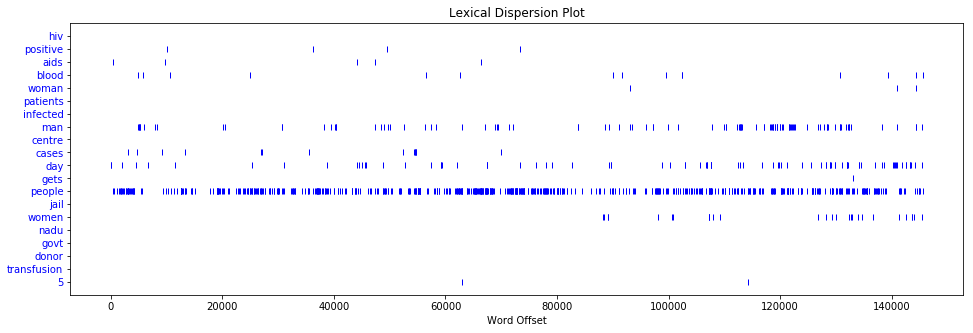

<Figure size 432x288 with 0 Axes>

In [184]:
from matplotlib.pyplot import plot, title, xlabel, ylabel, savefig, legend
import seaborn as sns
import numpy as np
import nltk
# nltk.download('gutenberg')
# nltk.download('genesis')
# nltk.download('nps_chat')
# nltk.download('webtext')
 
fdist = nltk.FreqDist(filter_words)
tup = (fdist.most_common(20))
aa , bb= zip(*tup)
freq = (
    (aa, 'green', 'words'),
    (bb, 'grey', 'frrquency'),
)
from  nltk.book import text4 as inaugural_speeches
plt.figure(figsize=(16,5))
topics = list(aa)
inaugural_speeches.dispersion_plot(topics)
savefig('foo00.png')


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/aashutosh/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /home/aashutosh/nltk_data...
[nltk_data]   Package words is already up-to-date!


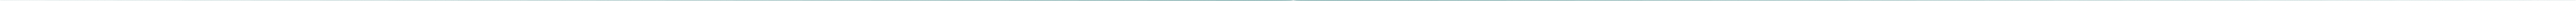

In [15]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
import tkinter
from tkinter import *
tagged = nltk.pos_tag(filter_words)
entities = nltk.chunk.ne_chunk(tagged)
entities

In [35]:
from nltk.corpus import treebank
import tkinter
nltk.download('treebank')
t = treebank.parsed_sents('wsj_0001.mrg')[0]
t.draw()

[nltk_data] Downloading package treebank to
[nltk_data]     /home/aashutosh/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


# This Research Report highlights the raise awareness of the link between HIV/AIDS and drug abuse — not just injection drug use but drug abuse in general.People who are high on drugs or alcohol are more likely to have unsafe sex that might expose them to HIV and other infectious diseases. In some populations(like jalandhar), HIV prevalence is converging among injection and noninjection drug users, suggesting that the risky behavior associated with drug abuse in general spread of the virus. For this reason, drug abuse treatment is HIV prevention. 





